In [1]:
import tensorflow as tf

import numpy as np
print(tf.__version__)


2.1.0


In [2]:
t = tf.random.normal(shape=(5,2))
paddings = tf.constant( (  [2,2],[2, 2] ) )  
# 'constant_values' is 0.
# rank of 't' is 2.
tf.print(tf.pad(t, paddings, "CONSTANT"))  # [[0, 0, 0, 0, 0, 0, 0],
                                 #  [0, 0, 1, 2, 3, 0, 0],
                                 #  [0, 0, 4, 5, 6, 0, 0],
                                 #  [0, 0, 0, 0, 0, 0, 0]]

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 -1.80813301 -1.36337006 0 0]
 ...
 [0 0 0.525498927 1.7972337 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [3]:
def zeroPadding(image,padding):
        "Only Works With 2D Image"
        "Padd the whole image "
        return tf.pad(image,( (padding, padding), (padding,padding) ))

In [4]:
img = tf.random.normal(shape=(3,3))
print(zeroPadding(img,2))

tf.Tensor(
[[ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.4675727   1.566594   -0.20323108  0.
   0.        ]
 [ 0.          0.         -1.8595825   0.7652014  -0.1685523   0.
   0.        ]
 [ 0.          0.          0.91427517  0.8281868  -0.39233765  0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]], shape=(7, 7), dtype=float32)


In [5]:
def conv_1(inputs,weights,bias):
    
    i_w = tf.multiply(inputs,weights)
    i_w = tf.reduce_sum(i_w,axis=None)
    i_w = i_w + 1 
    return i_w

tf.random.set_seed(3)
inputs = tf.random.normal(shape=(3,3))
weig = tf.random.normal(shape=(3,3))
bias = tf.random.normal(shape=(1,1))

conv_1(inputs,weig,bias)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7557945>

In [45]:
kernel = tf.constant([[1,1,1]])
tf.random.set_seed
def conv_forward(inputs, weights, bias,stride, padding ):
    """
        
    """
    
    (inputs_prev_height, inputs_prev_width) = inputs.shape[0], inputs.shape[1]
    (curr_height, curr_width) = weights.shape[0], weights.shape[1]
    
    output_height = int(int(inputs_prev_height + 2 * padding - curr_height) / stride + 1)
    output_width = int(int(inputs_prev_width + 2 * padding - curr_width) / stride + 1)
    
    output = tf.zeros(shape=(output_height,output_width)).numpy()
    
    print(output.shape)
    padded_inputs = zeroPadding(inputs,padding)
    slice_padded_inputs = tf.zeros(shape=(weights.shape))
    for h in range(output_height):
        vertical_start = stride * h
        vertical_end = vertical_start + curr_height
        for w in range(output_width):
            horiz_start = stride * w
            horiz_end = horiz_start + curr_width
            slice_padded_inputs  = padded_inputs[vertical_start : vertical_end,
                                                 horiz_start : horiz_end ]
            weightsR = weights[:,:]
            biasesR = bias[:,:]
            
            output[h,w] = conv_1(slice_padded_inputs, weightsR,biasesR) 
    
    assert (output.shape == (output_height,output_width))
    
    return output
            
            

In [48]:
np.random.seed(1)
A_prev = np.random.randn(5,5)
W = np.random.randn(3,3)
b = np.random.randn(1,1)
pad = 1
stride = 2
conv_forward(A_prev,np.random.normal(size=(3,3)),b,stride,pad)

(3, 3)


array([[ 6.9953213 , -0.64153206, -0.23561418],
       [ 5.9906673 , -0.80140746,  1.0055109 ],
       [ 1.1521933 ,  4.4655585 ,  1.850796  ]], dtype=float32)

In [49]:
tf.random.set_seed(5)
inputs = tf.random.normal(shape=(5,5))

weights = tf.random.normal(shape=(3,3))
bias = tf.random.normal(shape=(1,1))

conv_forward(inputs,weights,bias,2,1).shape

(3, 3)


(3, 3)

In [30]:
def initFilters(size,scale = 1.0):
    std  =   np.std((size))
    mean = 0.0 
    return np.random.normal(loc= mean , scale= std,size=(size.shape[0],
                                                         size.shape[1]))
initFilters(np.random.normal(size=(3,3)))

def initFilterDahJadi():
    return np.array([[0,-1,0],
                     [-1,4,-1],
                     [0,-1,0]])
initFilterDahJadi()

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [50]:
def initFilterOutline():
    return np.array([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])

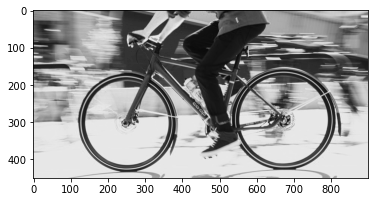

In [31]:
import matplotlib.pyplot as plt

img = plt.imread("ese.jpg") 
img = img[:,:,0]
plt.imshow(img,"gray")


(450, 900)


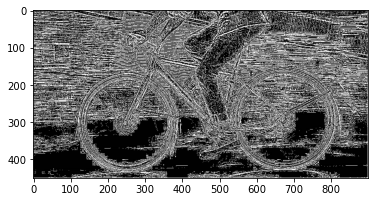

In [32]:
ansNo = conv_forward(img,
initFilterDahJadi(),bias,1,1)
plt.imshow(ansNo,"gray")

In [51]:
imgAlip = plt.imread("alip.jpeg")[:,:,0]
ansCok = conv_forward(imgAlip,
initFilterOutline(),bias,1,1)

(159, 318)


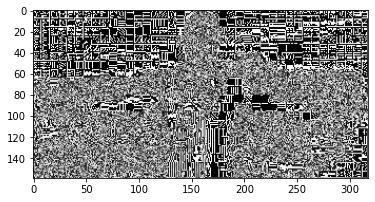

In [52]:
plt.imshow(ansCok,"gray")

(450, 900)


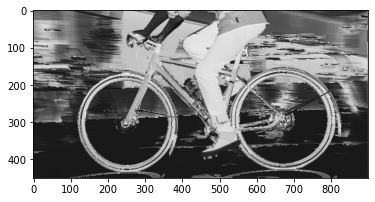

In [14]:
ans = conv_forward(img,
initFilters(np.random.normal(size=(3,3))),bias,1,1)
plt.imshow(ans,"gray")

In [15]:
print(img[1:5],"\n"*5,ans[1:5])

[[151 149 150 ... 213 212 209]
 [151 154 155 ... 215 213 211]
 [149 153 155 ... 203 200 197]
 [151 150 150 ... 193 188 184]] 




 [[ 99. 104. 103. ...  43.  43.  95.]
 [104.  99.  97. ...  39.  40.  91.]
 [113. 106. 102. ...  64.  68. 119.]
 [108. 112. 112. ...  71.  78. 145.]]


In [59]:
def maxPolling(img, kernel):
    
    img_height, img_width = img.shape
    kernel_height , kernel_width = kernel.shape
    
    output_height = int(img_height - kernel_height) +1 
    output_width = int(img_width - kernel_width) +1 
    
    output = tf.zeros(shape= (output_height,output_width)).numpy()
    print(output.shape)
    getSlicedMaxPooling = tf.zeros(shape=kernel.shape)
    for height in range(output_height):
        vertical_start = 1 * height
        vertical_end = vertical_start + kernel_height
        for width in range(output_width):
            width_start = 1 * width
            width_end = width_start + kernel_width
            getSlicedMaxPooling = img[vertical_start : vertical_end,
                                                     width_start : width_end]
            output[height,width] = getTheMax(getSlicedMaxPooling)
            
    return output
            
def getTheMax(arr):

    return tf.reduce_max(arr)



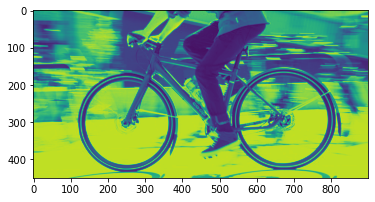

In [44]:
plt.imshow(img)



In [62]:
arr = (maxPolling(ansCok,initFilterDahJadi()))

(157, 316)


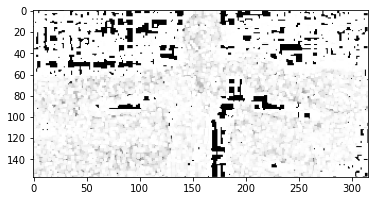

In [63]:
plt.imshow(arr,"gray")